# Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# read the files supply and demand using pandas 

supply = pd.read_csv('supply.csv')
demand = pd.read_csv('demand.csv')

In [49]:
#create a dataframe by merging supply and demand

df = supply.merge(demand,on='DATE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   CSUSHPISA_y     80 non-null     float64
 7   MORTGAGE30US    81 non-null     float64
 8   UMCSENT         81 non-null     float64
 9   INTDSRUSM193N   74 non-null     float64
 10  MSPUS           81 non-null     int64  
 11  GDP             81 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.2+ KB


# Arranging Data

In [50]:
#rename the column

df.rename(columns={'CSUSHPISA_x':'Home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit'\
                   ,'TLRESCONS':'Total_consumption spending'
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment'\
                   ,'INTDSRUSM193N':'Interest_rates','MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

In [51]:
df.drop(columns = ['CSUSHPISA_y'],inplace=True)

In [52]:
df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


# Data Preprocessing

In [53]:
#removing the missig values

df.dropna(inplace=True) # inplace=True argument is used for data frame to make changes permanent
df['Date'] = pd.to_datetime(df['Date']) #set the date formate
df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [54]:
#converting into mumerical standard data where float data type and upto decimal 1 using .round(1)

df['Home_price_index'] = df['Home_price_index'].astype(float).round(1)
df['Monthly_supply']=df['Monthly_supply'].astype(float).round(1)
df['Permit']=df['Permit'].astype(float).round(1)
df['Total_consumption spending']=df['Total_consumption spending'].astype(float).round(1)
df['Housing_inventory']=df['Housing_inventory'].astype(float).round(1)
df['30y_mortgage']=df['30y_mortgage'].astype(float).round(1)
df['Consumer_sentiment']=df['Consumer_sentiment'].astype(float).round(1)
df['Interest_rates']=df['Interest_rates'].astype(float).round(1)
df['Median_sales_price']=df['Median_sales_price'].astype(float).round(1)
df['GDP']=df['GDP'].astype(float).round(1)

df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


# Data Visualization

In [55]:
df

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4
...,...,...,...,...,...,...,...,...,...,...,...
69,2020-01-04,217.2,5.3,1210.7,603744.7,13876.0,3.2,74.1,0.2,322600.0,19636.7
70,2020-01-07,222.6,3.4,1577.7,646601.7,14249.0,3.0,75.7,0.2,337500.0,21362.4
71,2020-01-10,233.1,3.9,1698.3,707944.3,15446.0,2.8,79.8,0.2,358700.0,21704.7
72,2021-01-01,242.3,4.3,1765.7,753515.7,15602.0,2.9,80.2,0.2,369800.0,22313.8


In [56]:
df.corr()


C:\Users\91735\AppData\Local\Temp\ipykernel_17428\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
Home_price_index,1.000000,-0.110117,0.333440,0.795488,-0.463047,-0.356838,0.430737,0.147632,0.872944,0.768843
Monthly_supply,-0.110117,1.000000,-0.547535,-0.395263,0.629808,0.380945,-0.565981,0.140479,-0.272157,-0.140128
Permit,0.333440,-0.547535,1.000000,0.824670,-0.843025,0.342974,0.620069,0.559962,0.084618,-0.178993
Total_consumption spending,0.795488,-0.395263,0.824670,1.000000,-0.797005,0.021342,0.634291,0.445632,0.560888,0.323530
Housing_inventory,-0.463047,0.629808,-0.843025,-0.797005,1.000000,-0.001427,-0.537086,-0.236148,-0.283130,-0.080982
30y_mortgage,-0.356838,0.380945,0.342974,0.021342,-0.001427,1.000000,-0.077808,0.736962,-0.697431,-0.795245
Consumer_sentiment,0.430737,-0.565981,0.620069,0.634291,-0.537086,-0.077808,1.000000,0.316050,0.466563,0.287961
Interest_rates,0.147632,0.140479,0.559962,0.445632,-0.236148,0.736962,0.316050,1.000000,-0.205661,-0.365931
Median_sales_price,0.872944,-0.272157,0.084618,0.560888,-0.283130,-0.697431,0.466563,-0.205661,1.000000,0.944694
GDP,0.768843,-0.140128,-0.178993,0.323530,-0.080982,-0.795245,0.287961,-0.365931,0.944694,1.000000


In [57]:
df.describe()

,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,171.817568,6.013514,1277.967568,458671.113514,17287.635135,4.694595,83.909459,1.970270,265783.783784,16553.525676
std,28.014572,1.894428,484.190561,142075.509016,1291.164289,1.074472,11.344641,1.720762,47789.455555,3108.420318
min,129.300000,3.400000,538.700000,246953.300000,13876.000000,2.800000,57.700000,0.200000,186000.000000,11174.100000
25%,148.050000,4.800000,960.425000,330418.975000,16143.250000,3.825000,75.550000,0.800000,226600.000000,14409.300000
50%,169.250000,5.500000,1254.850000,473091.150000,17381.500000,4.400000,85.650000,1.050000,248250.000000,16137.950000
75%,184.625000,6.875000,1600.275000,561016.675000,18437.000000,5.800000,93.675000,2.575000,309675.000000,18919.875000
max,253.800000,11.400000,2228.300000,795501.300000,19137.000000,6.600000,98.900000,6.200000,382600.000000,23046.900000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        74 non-null     datetime64[ns]
 1   Home_price_index            74 non-null     float64       
 2   Monthly_supply              74 non-null     float64       
 3   Permit                      74 non-null     float64       
 4   Total_consumption spending  74 non-null     float64       
 5   Housing_inventory           74 non-null     float64       
 6   30y_mortgage                74 non-null     float64       
 7   Consumer_sentiment          74 non-null     float64       
 8   Interest_rates              74 non-null     float64       
 9   Median_sales_price          74 non-null     float64       
 10  GDP                         74 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 6.9 KB


In [59]:
df.dtypes

Date                          datetime64[ns]
Home_price_index                     float64
Monthly_supply                       float64
Permit                               float64
Total_consumption spending           float64
Housing_inventory                    float64
30y_mortgage                         float64
Consumer_sentiment                   float64
Interest_rates                       float64
Median_sales_price                   float64
GDP                                  float64
dtype: object

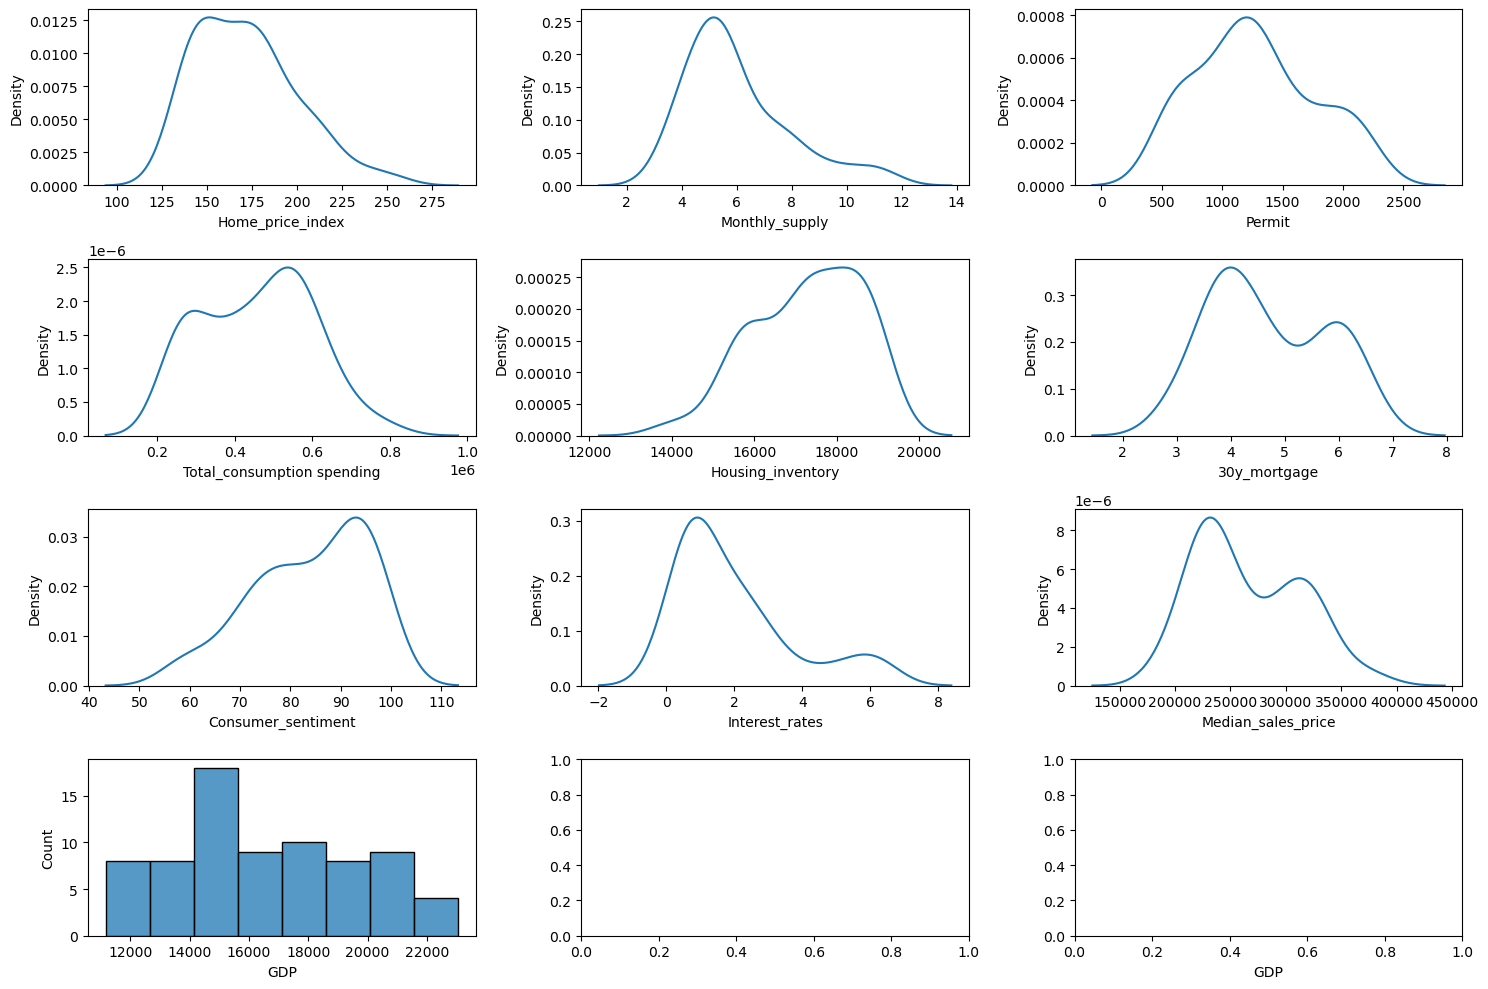

In [88]:
# num_data = df.select_dtypes("number")

# for col in num_data:
#     plt.figure(figsize=(5,4))
#     plt.hist(df[col])
#     plt.xlabel(col)
#     plt.show()





# df["GDP"] = pd.to_numeric(df["GDP"])
# numerical_columns = df.select_dtypes(include="number").columns

# # Create subplots
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# # Iterate over the numerical columns
# for i, col in enumerate(numerical_columns):
#     print(i,col)
#     # Plot the kde plot
#     sns.kdeplot(data=df[col], ax=axes[i // 3, i % 3])

#     # Add labels and title
#     plt.xlabel(col)

# # Show the plot
# plt.tight_layout()
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df["GDP"] = pd.to_numeric(df["GDP"])
numerical_columns = df.select_dtypes(include="number").columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    if col == "GDP":
        sns.histplot(data=df[col], ax=axes[i // 3, i % 3])
    else:
        sns.kdeplot(data=df[col], ax=axes[i // 3, i % 3])
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [83]:
for i in df.columns:
    print('skewness of {} is {}'.format(i, df[i].skew()))

skewness of Home_price_index is 0.7198862678173291
skewness of Monthly_supply is 1.1811309112116433
skewness of Permit is 0.29593482843504926
skewness of Total_consumption spending is 0.06884664235907757
skewness of Housing_inventory is -0.47531078308476904
skewness of 30y_mortgage is 0.24250885869988809
skewness of Consumer_sentiment is -0.5619587329656679
skewness of Interest_rates is 1.314996875509302
skewness of Median_sales_price is 0.44041250979650737
skewness of GDP is 0.2377899645731914


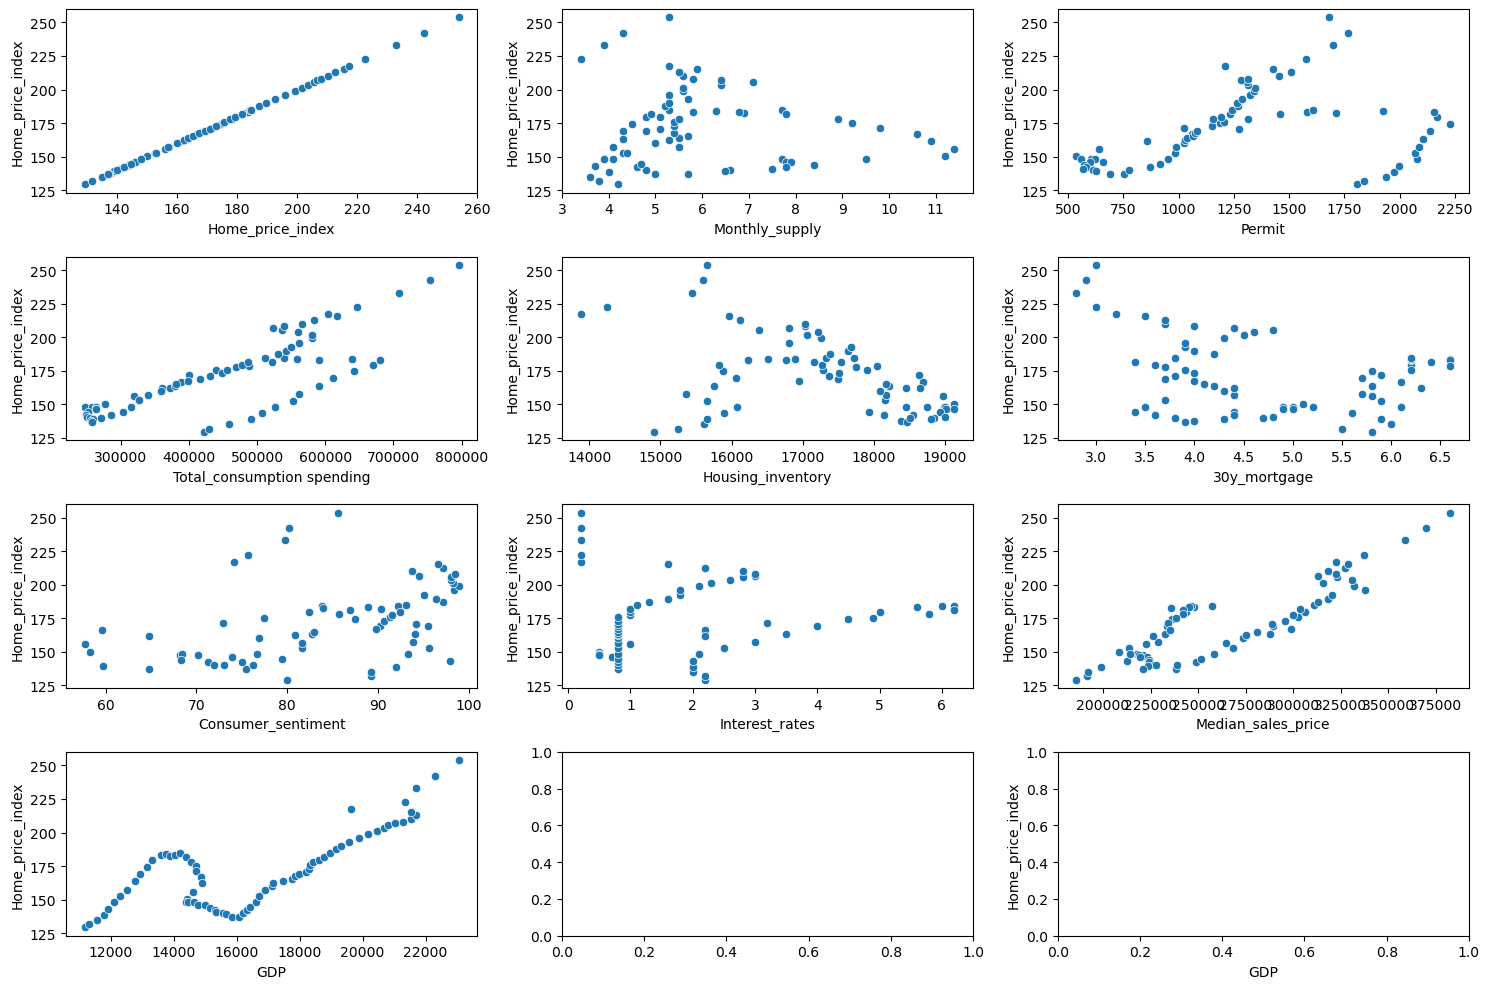

In [77]:
# for i in df.select_dtypes(include=np.number):
#     plt.figure(figsize=(5,4))

#     sns.scatterplot(data=df , x = i, y="Home_price_index")
#     plt.show()
numerical_columns = df.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y="Home_price_index", ax=axes[i // 3, i % 3])
    plt.xlabel(col)
    plt.ylabel("Home_price_index")

plt.tight_layout()
plt.show()

C:\Users\91735\AppData\Local\Temp\ipykernel_17428\1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

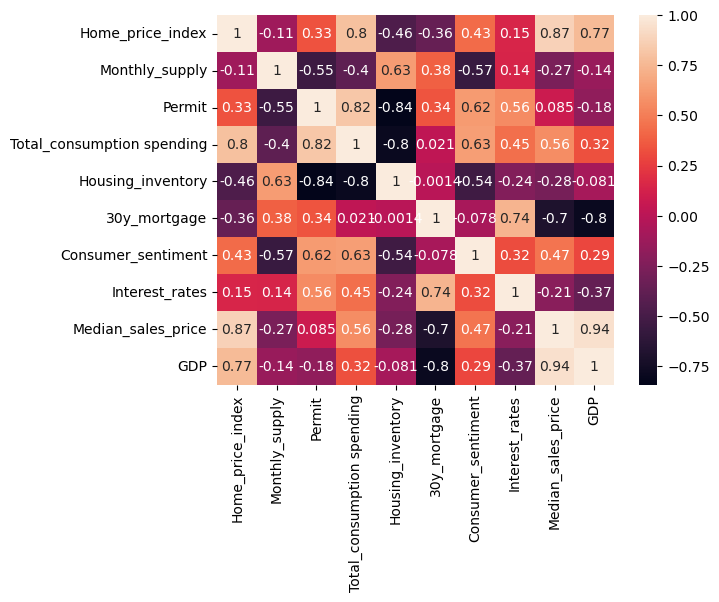

In [62]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [63]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


In [65]:
correlation = df.drop('Date',axis=1)
correlation.head(5)

,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


# Machine Learning Model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [102]:
X = df.drop('Home_price_index',axis=1)
Y = df[["Home_price_index"]]
Y

,Home_price_index
0,129.3
1,131.8
2,135.0
3,138.8
4,143.3
...,...
69,217.2
70,222.6
71,233.1
72,242.3


In [90]:
Xc=sm.add_constant(X)
Xc.head()

,const,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,1.0,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,1.0,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,1.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,1.0,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,1.0,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


In [96]:
model = sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Home_price_index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     517.5
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           3.25e-56
Time:                        15:38:12   Log-Likelihood:                -191.98
No. Observations:                  74   AIC:                             404.0
Df Residuals:                      64   BIC:                             427.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         74.1488     17.743      4.179      0.000      38.704     109.594
Monthly_supply                 2.5897      0.662      3.913      0.000       1.267       3.912
Permit                        -0.0111      0.005     -2.013      0.048      -0.022    -8.5e-05
Total_consumption spending     0.0001   1.88e-05      7.787      0.000       0.000       0.000
Housing_inventory             -0.0020      0.001     -2.512      0.015      -0.004      -0.000
30y_mortgage                  -0.8239      1.687     -0.488      0.627      -4.194       2.546
Consumer_sentiment            -0.2506      0.071     -3.524      0.001      -0.393      -0.109
Interest_rates                 1.8775      0.520      3.607      0.001       0.838       2.917
Median_sales_price          8.524e-05    5.6e-05      1.522      0.133   -2.66e-05       0.000
GDP                            0.0038      0.001      5.257      0.000       0.002       0.005
==============================================================================
Omnibus:                        1.619   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.646
Skew:                           0.325   Prob(JB):                        0.439
Kurtosis:                       2.665   Cond. No.                     2.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
from sklearn.model_selection import cross_val_score,KFold

In [98]:
cols = list(X.columns)
cols

['Monthly_supply',
 'Permit',
 'Total_consumption spending',
 'Housing_inventory',
 '30y_mortgage',
 'Consumer_sentiment',
 'Interest_rates',
 'Median_sales_price',
 'GDP']

In [99]:
p = pd.Series(model.pvalues.values[1:],index = cols) 
p   

Monthly_supply                2.236154e-04
Permit                        4.830183e-02
Total_consumption spending    7.651018e-11
Housing_inventory             1.455200e-02
30y_mortgage                  6.269257e-01
Consumer_sentiment            7.916985e-04
Interest_rates                6.065788e-04
Median_sales_price            1.328205e-01
GDP                           1.800529e-06
dtype: float64

In [101]:
LR=LinearRegression()
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=0) #explicit definition
rmse=cross_val_score(LR,X,Y,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(rmse))
rmse_sd=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 4.229865646008682
Var_Error 0.7338457439021193


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [104]:
sc = StandardScaler()
X_std=sc.fit_transform(X)

In [106]:
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [114]:
knn=KNeighborsRegressor()
hyp_par={'n_neighbors':np.arange(3,20),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,hyp_par,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [115]:
GS.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [116]:
knn_tuned=KNeighborsRegressor(n_neighbors=14,weights='distance')

In [117]:
rmse=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(rmse))
rmse_sd=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 11.371396903232279
Var_Error 5.855172078942518


In [119]:
GB_bias=[]
GB_ve=[]
for n in np.arange(1,100):
  GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(GB,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  GB_bias.append(np.mean(rmse))
  GB_ve.append((np.std(rmse,ddof=1)))
print(GB_bias)
print(GB_ve)

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array w

[34.882412393966256, 33.65048816284148, 33.02603454138424, 32.0431151977605, 31.08764829198097, 30.718067602313408, 29.944259471925193, 29.270033190441467, 28.917123900607436, 28.544523727173992, 28.153685321134173, 27.79251336987022, 27.434476773226617, 27.28108855411995, 27.106097774025027, 26.894691542688335, 26.700099602768518, 26.571519129199732, 26.429017964833918, 26.394194263970732, 26.302716253252886, 26.118920744372037, 26.092288945857888, 25.946250002528217, 25.87869092763791, 25.821113567597894, 25.726468628380818, 25.575099385002904, 25.486655418600858, 25.405017935619288, 25.340326118076195, 25.264480321117954, 25.208271932883694, 25.154406188412832, 25.121833135335283, 25.12042136252488, 25.071680439797223, 25.038701119278244, 25.04971568667715, 24.98837348321408, 24.982956468187542, 24.975991992318573, 24.940853313426157, 24.904487890046124, 24.88736344387553, 24.881906624104232, 24.870963690219085, 24.84640162745086, 24.848112557391904, 24.830293294861573, 24.817539317

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


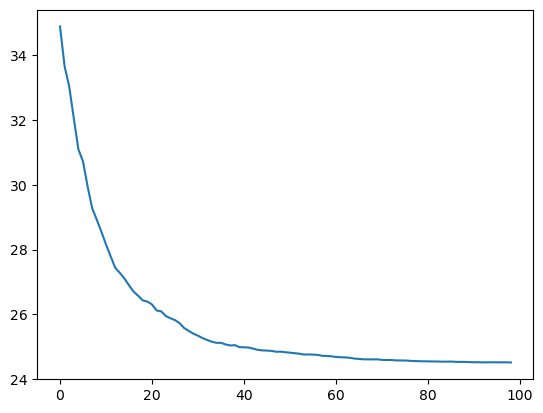

In [120]:
x_axis=np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)

In [121]:
np.argmin(GB_bias)

98

In [122]:
ABLR_BE=[]
for n in np.arange(1,100):
  ABLR=AdaBoostRegressor(base_estimator=LR,n_estimators=n,random_state=0)
  scores=cross_val_score(ABLR,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  ABLR_BE.append(np.mean(rmse))

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Use

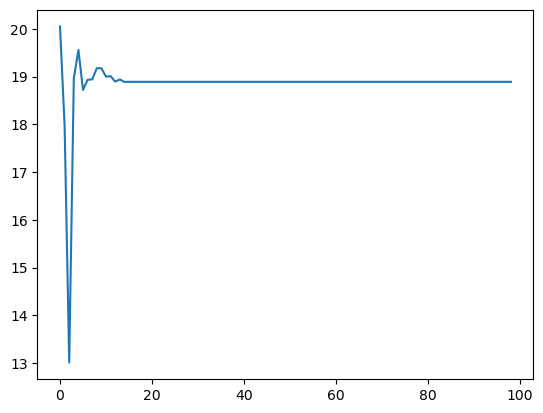

In [123]:
x_axis=np.arange(len(ABLR_BE))
plt.plot(x_axis,ABLR_BE)

In [125]:
np.argmin(ABLR_BE)

2

In [126]:
AB_bias=[]
for n in np.arange(1,150):
  AB=AdaBoostRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(AB,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  AB_bias.append(np.mean(rmse))

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was pass

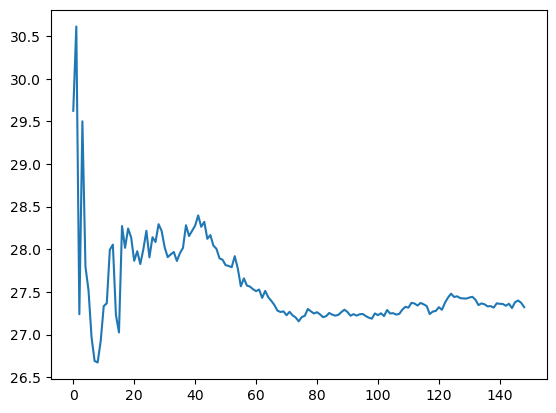

In [127]:
x_axis=np.arange(len(AB_bias))
plt.plot(x_axis,AB_bias)

In [130]:
RF_tuned=RandomForestRegressor(criterion='squared_error',n_estimators=60,random_state=0)

In [131]:
ABRF_bias=[]
ABRF_var=[]
for n in np.arange(1,100):
  ABRF=AdaBoostRegressor(base_estimator=RF_tuned,n_estimators=n,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=2)
  scores=cross_val_score(ABRF,X_std,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  ABRF_bias.append(np.mean(rmse))
  ABRF_var.append(np.std(rmse,ddof=1))

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Use

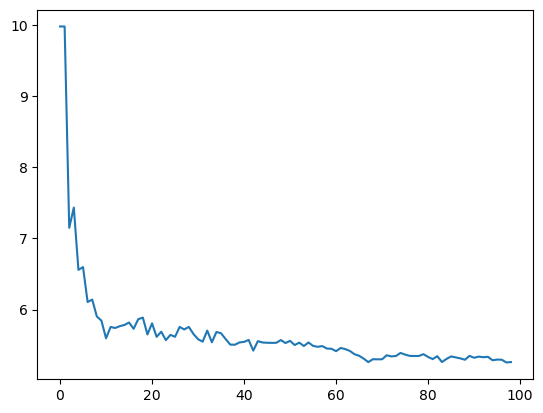

In [132]:
x_axis=np.arange(len(ABRF_bias))
plt.plot(x_axis,ABRF_bias)

In [138]:
np.argmin(ABRF_bias),np.min(ABRF_bias),ABRF_var[64]

(97, 5.255104669225765, 1.6082599882171327)

In [140]:
RF_bias=[]
RF_var=[]
for n in np.arange(1,100):
  RF=RandomForestRegressor(criterion='squared_error',n_estimators=n,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=2)
  scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  RF_bias.append(np.mean(rmse))
  RF_var.append(np.std(rmse,ddof=1))

c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\mod

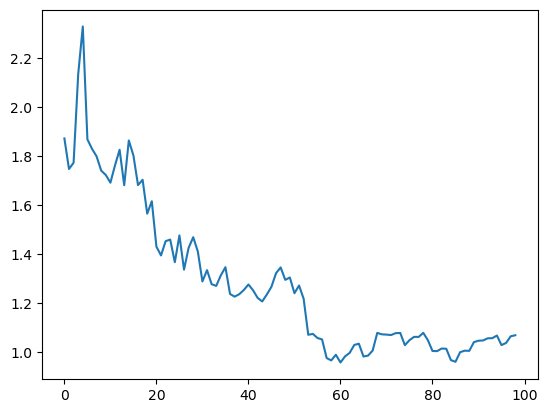

In [141]:
x_axis=np.arange(len(RF_var))

plt.plot(x_axis,RF_var)

In [167]:
np.argmin(RF_var),np.min(RF_var),RF_bias[60]

(60, 0.958751920905685, 5.80237271642865)

In [160]:
LR=LinearRegression()
knn_tuned=KNeighborsRegressor(n_neighbors=14,weights='distance')
LR_AB=AdaBoostRegressor(base_estimator=LR,n_estimators=8,random_state=0)
RF_AB=AdaBoostRegressor(base_estimator=RF_tuned,n_estimators=139,random_state=0)
DT_AB=AdaBoostRegressor(n_estimators=131,random_state=0)
LR_GB=GradientBoostingRegressor(n_estimators=13,random_state=0)
RF_tuned=RandomForestRegressor(criterion='squared_error',n_estimators=3,random_state=0)
stacked = VotingRegressor(estimators = [('LR', LR),('Boosted_LR', LR_AB)])

In [161]:
models = []
models.append(('LinearRegression', LR))
models.append(('KNN',knn_tuned))
models.append(('BoostedLR',LR_AB))
models.append(('BoostedRF',RF_AB))
models.append(('BoostedDT',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF_tuned))
models.append(('Stacked',stacked))

In [157]:
import sklearn.model_selection as model_selection


LinearRegression: 4.229866 (0.733846)
KNN: 11.371397 (5.855172)
BoostedLR: 4.022056 (0.363291)


c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Use

BoostedRF: 7.161708 (3.328474)


c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BoostedDT: 8.491757 (3.484773)
GBoost: 11.439388 (4.142785)
RF: 9.371656 (2.108800)
Stacked: 4.090437 (0.520743)


c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\91735\anaconda3\envs\greatlearning\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed wh

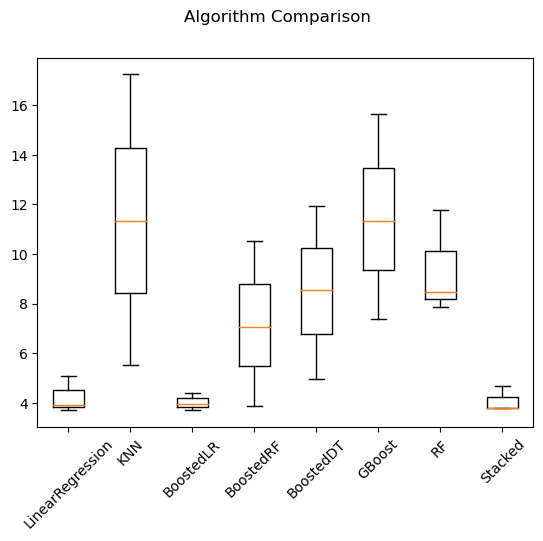

In [165]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(names,rotation=45)
plt.show()

In [166]:
print(results)
print(names)

[array([3.91434779, 5.06870162, 3.70654753]), array([ 5.53817187, 17.24827197, 11.32774686]), array([3.69027816, 4.41025691, 3.96563352]), array([ 3.88089337, 10.53587733,  7.06835344]), array([ 4.97409333, 11.94268093,  8.55849795]), array([ 7.35984036, 15.64263958, 11.3156847 ]), array([ 7.8614135 , 11.78098845,  8.47256739]), array([3.78373267, 4.69169772, 3.79587966])]
['LinearRegression', 'KNN', 'BoostedLR', 'BoostedRF', 'BoostedDT', 'GBoost', 'RF', 'Stacked']


In [71]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# scaler = StandardScaler()
# X_train_scaled =  scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [72]:
#Random Forest

regressor = RandomForestRegressor(n_estimators=100,max_depth=5)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test,y_pred)

0.9592146973040692

[0.9666027291408235,
 0.9746381294011234,
 0.9505957516329792,
 0.9409845976098918,
 0.9194929465979306,
 0.9035139143410006,
 0.8788770336578968,
 0.8545999764834524,
 0.8235255158091749,
 0.7999734824883431,
 0.7796412595463614,
 0.7600523868409171,
 0.7533012294443815,
 0.73557375020154,
 0.7273387654374689,
 0.7023947717777805,
 0.6971397859936301,
 0.6746357162106247,
 0.6522028973258133,
 0.624180252748463,
 0.5984581178308079,
 0.5770460931502255,
 0.5670853375309246,
 0.5568049721319439]

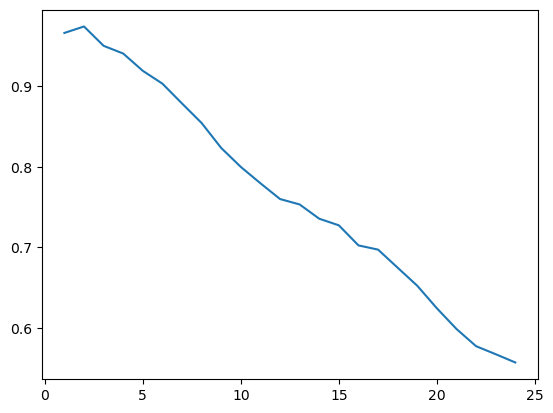

In [73]:
k_range = range(1, 25)
knn_score = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    knn_score.append(r2_score(y_test, knn_pred))

plt.plot(k_range,knn_score);
knn_score

In [74]:
#Ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.9344563047008475

In [75]:
#Gradient Booster
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gb_reg.fit(X_train_scaled, y_train)
gb_pred = gb_reg.predict(X_test_scaled)

r2_score(y_test, gb_pred)

0.9401321847440689

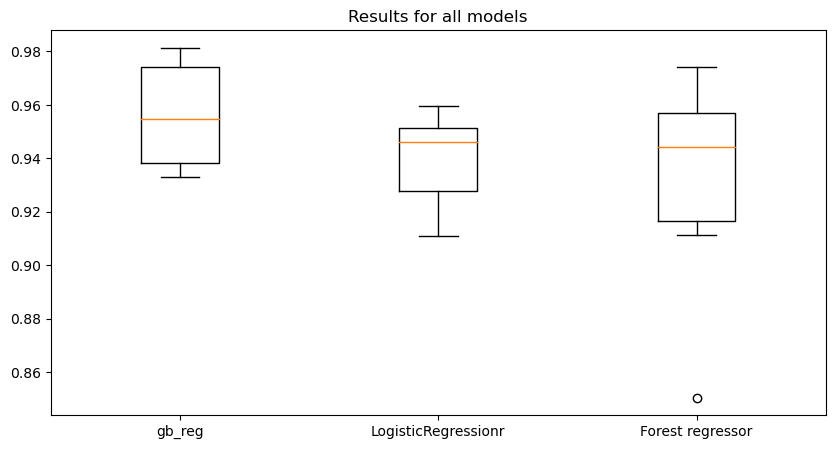

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Results for all models')
models = {"gb_reg":  GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1), "LogisticRegressionr": ridge_reg,"Forest regressor": RandomForestRegressor(n_estimators=100, max_depth=5)}

outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

# Summary

Monthly supply: The monthly supply of houses is the number of homes that are available for sale divided by the number of homes that are sold each month. A low monthly supply indicates that there are more buyers than sellers, which can lead to higher prices. Consumer sentiment: Consumer sentiment is a measure of how confident consumers are about the economy. A high level of consumer sentiment indicates that consumers are more likely to buy homes, which can lead to higher demand and higher prices. Housing inventory: Housing inventory is the number of homes that are available for sale. A low housing inventory indicates that there are fewer homes available for sale, which can lead to higher prices. Median sales price: The median sales price is the price at which half of the homes sold for more and half sold for less. A rising median sales price indicates that home prices are increasing. GDP: GDP is the total value of goods and services produced in a country. A rising GDP indicates that the economy is growing, which can lead to higher demand for housing and higher prices. As you can see, the supply and demand of houses are closely correlated. When there is a low supply of houses and a high demand, prices tend to rise. When there is a high supply of houses and a low demand, prices tend to fall.

 